# UQ CSSE4011 ML workshop (Mar 2023)

This file is view-only. Please copy the notebook to your own drive or local directory to make any changes.

Short URL: [shorturl.at/brLTU](https://shorturl.at/brLTU)

Long URL: [colab.research.google.com/drive/1z1PLIzeaQJigY7yrcELpb2goC08Ff0Jz?usp=sharing](https://colab.research.google.com/drive/1z1PLIzeaQJigY7yrcELpb2goC08Ff0Jz?usp=sharing)

**Content**

*   Supervised Learning - KNN, SVM classification
*   Unsupervised Learning - K-Means, DBSCAN clustering
*   Exercise: image classification with deep neural networks

## Preparation

Install python packages

In [ ]:
!pip install numpy
!pip install scikit-learn
!pip install scipy
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Supervised Learning - KNN Classification
1. Calculate the distance.
2. Find the k nearest neighbours.
3. Vote for classes

### Load dataset

Train Set


,x0,x1,y
0,-0.677425,0.886901,0
1,-0.623333,1.288624,0
2,-0.354503,1.425725,0
3,1.094568,0.242608,0
4,0.750070,0.339953,0
...,...,...,...
135,-0.011529,-0.233201,1
136,-1.240677,0.513988,0
137,-0.240617,1.140742,0
138,0.548546,-0.225017,0


Test Set


,x0,x1,y
0,-0.677425,0.886901,0
1,-0.623333,1.288624,0
2,-0.354503,1.425725,0
3,1.094568,0.242608,0
4,0.750070,0.339953,0
...,...,...,...
135,-0.011529,-0.233201,1
136,-1.240677,0.513988,0
137,-0.240617,1.140742,0
138,0.548546,-0.225017,0


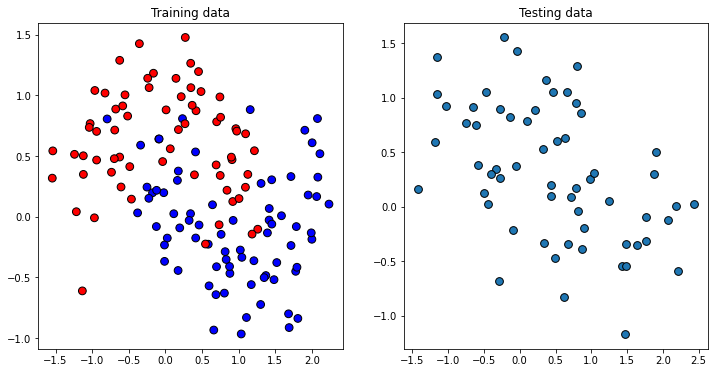

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Generate some random data
data = make_moons(n_samples=200, noise=0.3, random_state=0)
X, y = data

# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

# View train/test data
print ('Train Set')
df_train = pd.DataFrame({'x0':X_train[:,0],'x1':X_train[:,1],'y':y_train})
display(df_train)
print ('Test Set')
df_test = pd.DataFrame({'x0':X_train[:,0],'x1':X_train[:,1],'y':y_train})
display(df_test)

# Colour maps for better view
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot training and testing data
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train, s=60, cmap=cm_bright, edgecolor="k")
axes[0].set_title("Training data")
axes[1].scatter(X_test[:, 0], X_test[:, 1], marker="o", c=None, s=60, edgecolor="k")
axes[1].set_title("Testing data")

plt.show()

### Train a classifier

[]

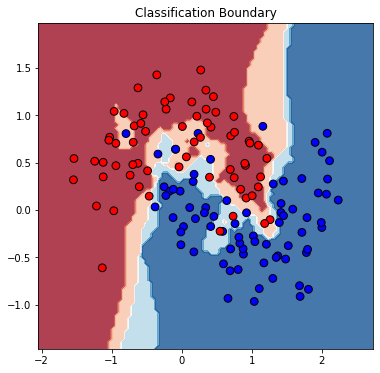

In [ ]:
# Create a classifier: a KNN classifier
clf = KNeighborsClassifier(3)

# Learn the train subset
clf.fit(X_train, y_train)

# Visualise the classification plane
fig, ax = plt.subplots(1,1,figsize=(6, 6))
ax.set_title("Classification Boundary")
boundary_disp = DecisionBoundaryDisplay.from_estimator(clf, X_train, cmap=cm, ax=ax, alpha=0.8, eps=0.5)
boundary_disp.ax_.scatter(X_train[:, 0], X_train[:, 1], marker="o", cmap=cm_bright, c=y_train, s=60, edgecolor="k")

plt.plot()

### Evaluation

[]

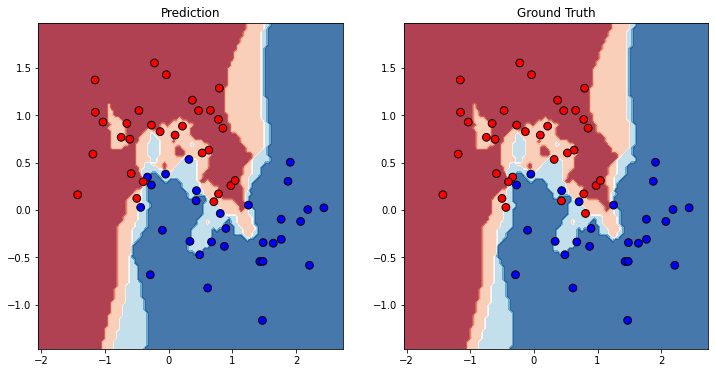

In [ ]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

# Visualise the classification boundary and result
fig, axes = plt.subplots(1,2,figsize=(12, 6))
axes[0].set_title("Prediction")
boundary_disp = DecisionBoundaryDisplay.from_estimator(clf, X_train, cmap=cm, ax=axes[0], alpha=0.8, eps=0.5)
boundary_disp.ax_.scatter(X_test[:, 0], X_test[:, 1], marker="o", cmap=cm_bright, c=predicted, s=60, edgecolor="k")

axes[1].set_title("Ground Truth")
boundary_disp = DecisionBoundaryDisplay.from_estimator(clf, X_train, cmap=cm, ax=axes[1], alpha=0.8, eps=0.5)
boundary_disp.ax_.scatter(X_test[:, 0], X_test[:, 1], marker="o", cmap=cm_bright, c=y_test, s=60, edgecolor="k")

plt.plot()

In [ ]:
# Evaluate the result with metrics
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        34
           1       0.83      0.96      0.89        26

    accuracy                           0.90        60
   macro avg       0.90      0.91      0.90        60
weighted avg       0.91      0.90      0.90        60




<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" alt= “precision-recall-wiki” height="600">

## Supervised Learning - Support Vector Machine (SVM) Classification on MNIST
MNIST is a hand-written digits dataset from UCI. The task is to classify the hand-written digits and assgin the label from 0-9.

1.   Load and visualise dataset
2.   Build classifier
3.   Evaluate the result

For more details, please go to: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

### Load dataset

Data shape (1797, 8, 8)


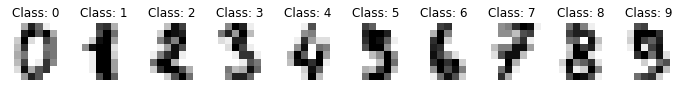

In [ ]:
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
print ('Data shape', digits.images.shape)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(12, 6))

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Class: %i" % label)

In [ ]:
# Flatten the images as 64-d feature vectors
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print ('Flattened data shape', data.shape)

# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)
print ('Train size', X_train.shape)
print ('Test size', X_test.shape)



Flattened data shape (1797, 64)
Train size (1257, 64)
Test size (540, 64)


### Train a classifier

In [ ]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

SVC(gamma=0.001)

### Evaluation

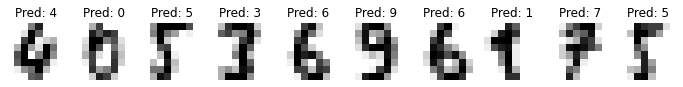

In [ ]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(12, 6))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Pred: {prediction}")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




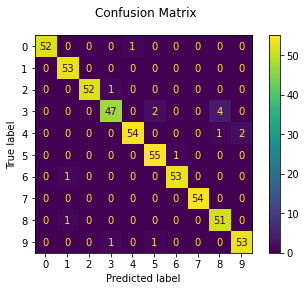

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

## Unsupervised Learning - Clustering


### Load Dataset

In this section, we're going to generate a random dataset to test a few clustering methods.

More details: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

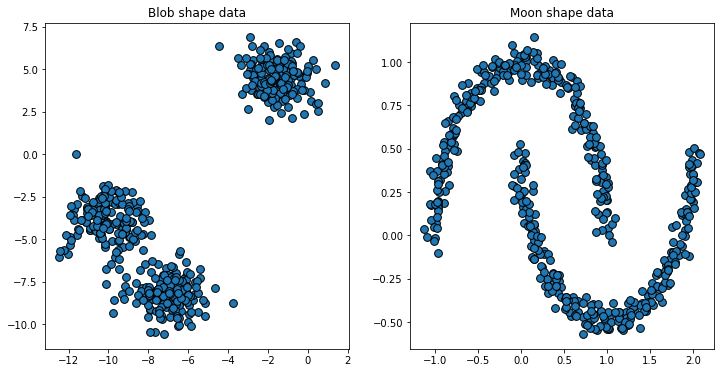

In [14]:
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans, DBSCAN

np.random.seed(1)

# Generate datasets.
n_samples = 500
data_blobs = datasets.make_blobs(n_samples=n_samples, random_state=1)
X_b, y_b = data_blobs
data_noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
X_m, y_m = data_noisy_moons

# Plot training and testing data
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(X_b[:, 0], X_b[:, 1], marker="o", c=None, s=60, edgecolor="k")
axes[0].set_title("Blob shape data")
axes[1].scatter(X_m[:, 0], X_m[:, 1], marker="o", c=None, s=60, edgecolor="k")
axes[1].set_title("Moon shape data")

plt.show()

### K-Means Clustering
K-means is a centroid-based algorithm. 

We need to specify the number of clusters and initialise centroids to make this algorithm work.



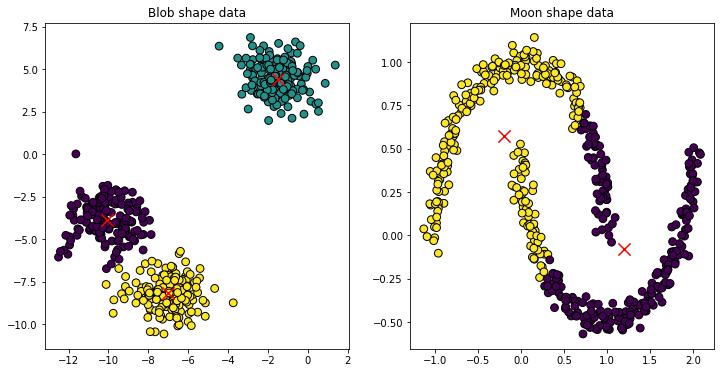

In [16]:
# Build model for 'blob' data
kmeans_b = KMeans(n_clusters=3, random_state=1, n_init="auto").fit(X_b)
y_b = kmeans_b.predict(X_b)

# Build model for 'moon' data
kmeans_m = KMeans(n_clusters=2, random_state=1, n_init="auto").fit(X_m)
y_m = kmeans_m.predict(X_m)

# Plot clustering result
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(X_b[:, 0], X_b[:, 1], marker="o", c=y_b, s=60, edgecolor="k")
axes[0].scatter(kmeans_b.cluster_centers_[:,0],kmeans_b.cluster_centers_[:,1], 
                marker="x", c='r', s=150)
axes[0].set_title("Blob shape data")

axes[1].scatter(X_m[:, 0], X_m[:, 1], marker="o", c=y_m, s=60, edgecolor="k")
axes[1].scatter(kmeans_m.cluster_centers_[:,0], kmeans_m.cluster_centers_[:,1], 
                marker="x", c='r', s=150)
axes[1].set_title("Moon shape data")

plt.show()

### DBSCAN Clustering

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering.

**eps** and **min_samples** need to be configured to make a good clustering.

**eps:** The maximum distance between two samples for one to be considered as in the neighborhood of the other. 

**min_samples:** The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

More details: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

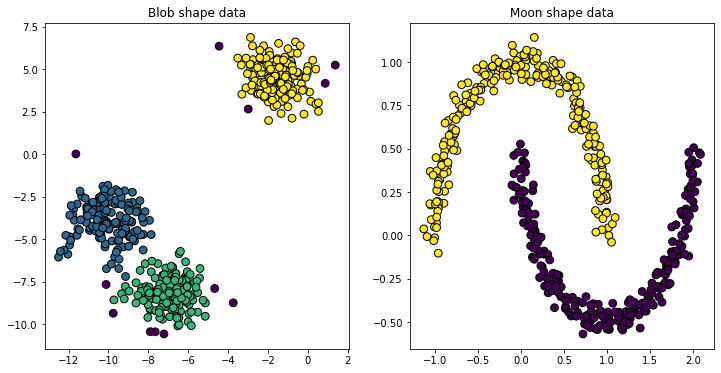

In [15]:
# Build model for 'blob' data
dbscan_b = DBSCAN(eps=0.8, min_samples=5).fit(X_b)
y_b = dbscan_b.labels_

# Build model for 'moon' data
dbscan_m = DBSCAN(eps=0.3, min_samples=5).fit(X_m)
y_m = dbscan_m.labels_

# Plot clustering result
figure, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(X_b[:, 0], X_b[:, 1], marker="o", c=y_b, s=60, edgecolor="k")
axes[0].set_title("Blob shape data")

axes[1].scatter(X_m[:, 0], X_m[:, 1], marker="o", c=y_m, s=60, edgecolor="k")
axes[1].set_title("Moon shape data")

plt.show()

## Exercise: image classification with deep neural networks

Check out PyTorch
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html 